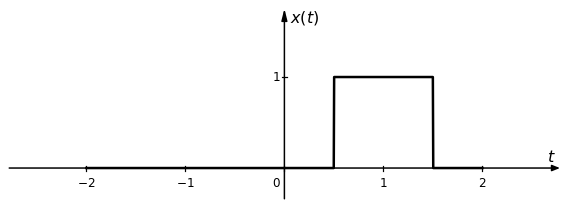

In [5]:
# 1. Usar todo junto (estilo actual)

from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=rect(t-1)", horiz_range=(-2, 2), vert_range=(0,1.2)).plot()

In [6]:
# 2. Usar modularmente

from blockdiagrams import SignalPlotter

p = SignalPlotter("y(t)=0.9* delta(t) + tri(t - 1)", horiz_range=(-3, 3), figsize=(12,4), color='blue')
p.setup_axes()
p.draw_labels()
p.draw_function()
p.draw_impulses()
p.draw_ticks(xticks=[0, 2, 3], xtick_labels=['a','e^{j\\pi/2}', '\\theta'])
p.show()


AttributeError: 'SignalPlotter' object has no attribute 'ax'

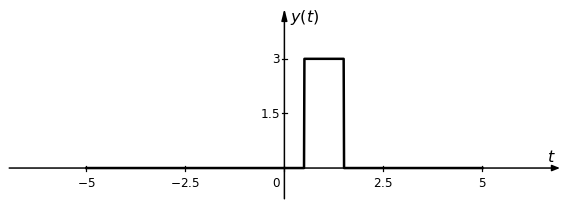

In [ ]:
# 3. Usar funciones personalizadas

from blockdiagrams import SignalPlotter

SignalPlotter("y(t)=3 * rect(t - 1)").plot()

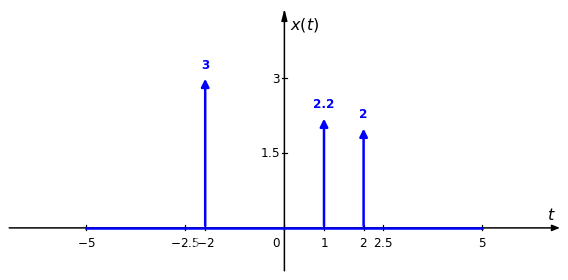

In [ ]:
# 4. Impulsos con múltiples raíces

from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t/2-1) + 2.2*delta(t - 1) + 3*delta(t + 2)", color='blue', figsize=(8,4)).plot()


In [ ]:
# 5. Guardar a archivo

from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=sin(t)*rect(t/2)", save_path="salida.png", show_plot=False).plot()


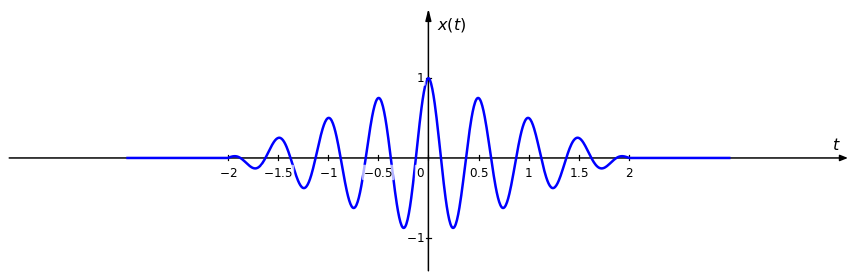

In [ ]:
from blockdiagrams import SignalPlotter
import numpy as np

signal1 = SignalPlotter("x(t)=cos(4 pi t)*tri(t/2)", alpha=0.7, horiz_range=[-3, 3], xticks=np.linspace(-2, 2, 9), color='blue', figsize=(12,4))
signal1.plot()


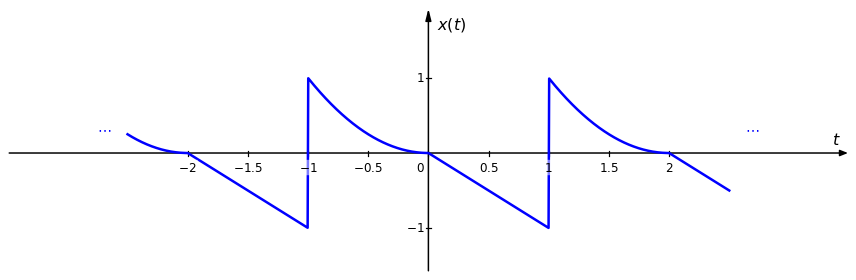

In [ ]:
from blockdiagrams import SignalPlotter
import numpy as np

signal1 = SignalPlotter("x(t)=pw((t**2, (t>-1) & (t<0)), (-t, (t>=0) & (t<1)), (0, True))", horiz_range=[-2.5, 2.5], xticks=np.linspace(-2, 2, 9), color='blue', figsize=(12,4), periodo=2)
signal1.plot()


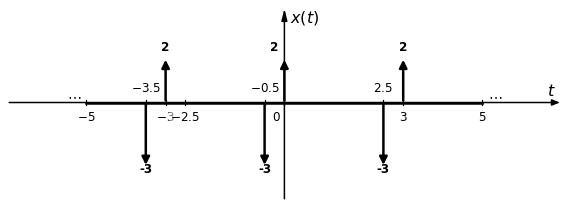

In [ ]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=2*delta(t) - 3*delta(t+0.5)", yticks=None, periodo=3).plot()


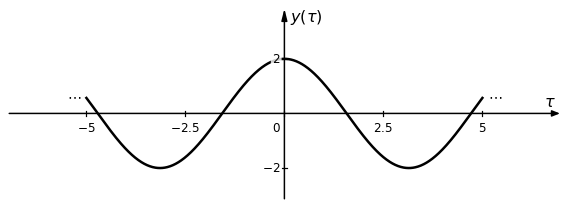

In [ ]:
from blockdiagrams import SignalPlotter

signal1 = SignalPlotter(r'y(\tau)=2*cos(\tau)',alpha=0.8, xticks='auto')
signal1.plot()

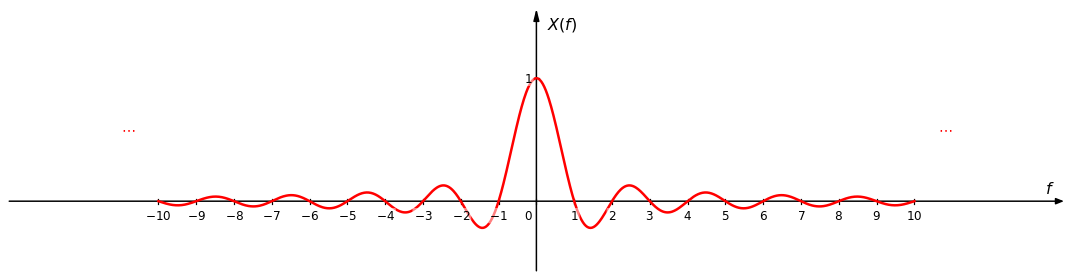

In [ ]:
from blockdiagrams import SignalPlotter
import numpy as np

SignalPlotter("X(f)=sinc(f)", horiz_range=[-10, 10], xticks=np.linspace(-10, 10, 21), figsize=(15, 4), color='red').plot()

In [ ]:
%matplotlib notebook
from blockdiagrams import SignalPlotter

sp = SignalPlotter("X(f)=sin(pi f)/(pi f)", horiz_range=(-10, 10), num_points=500)
sp.plot()

# Esta llamada devuelve el HTML con la animación embebida, que Jupyter muestra
sp.animate_signal(interval=10)


<IPython.core.display.Javascript object>

AttributeError: 'SignalPlotter' object has no attribute 'animate_signal'

In [ ]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=2*delta(t) - 3*delta(t-1)", periodo=None,
              yticks=[]).plot()

<IPython.core.display.Javascript object>

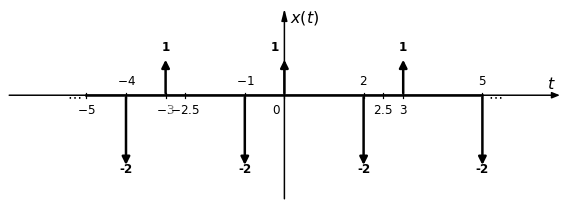

In [ ]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t) - 2*delta(t-2)", yticks=None, periodo=3, horiz_range=(-5,5)).plot()

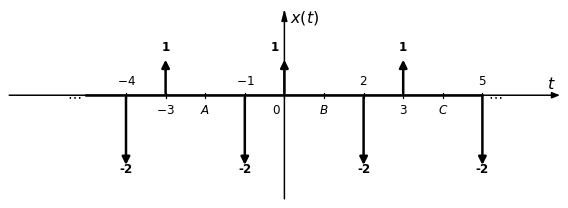

In [ ]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t) - 2*delta(t-2)", periodo=3, horiz_range=(-5,5),
              xticks=[-2,1, 4], xtick_labels=['A','B','C'], yticks=[]).plot()

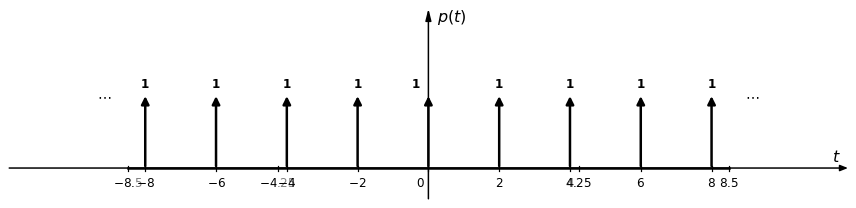

In [ ]:
from blockdiagrams import SignalPlotter

SignalPlotter("p(t)=delta(t)", yticks=None, periodo=2, horiz_range=(-8.5,8.5), vert_range=[0,1.5], figsize=[12, 3]).plot()

In [ ]:
from blockdiagrams import SignalPlotter
import numpy as np

SignalPlotter("x(t)=exp(-(t-1))*u(t-1)", xticks=[0, 1], xtick_labels=[0,'t_0'], yticks=[1], ytick_labels=['a'], horiz_range=[0, 5]).plot()

<IPython.core.display.Javascript object>

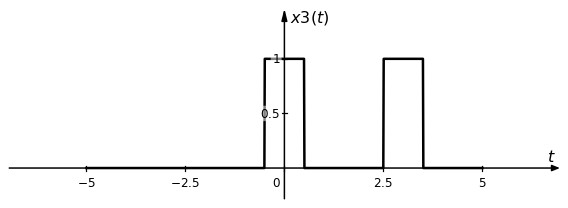

x1(t) =
-θ(t - 0.5) + θ(t + 0.5)

x2(t) =
-θ(t - 0.5) + θ(t + 0.5)

x3(t) =
θ(0.5 - t) - θ(-t - 0.5) - θ(t - 3.5) + θ(t - 2.5)



In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-5, 5))
sp.add_signal("x1(t)=rect(t)")
sp.add_signal("x2(t)=x1(t)")
sp.add_signal("x3(t)=x2(-t)+x1(t-3)")
sp.plot("x3")

from sympy import pprint

for name, expr in sp.signal_defs.items():
    print(f"{name}(t) =")
    pprint(expr)
    print()

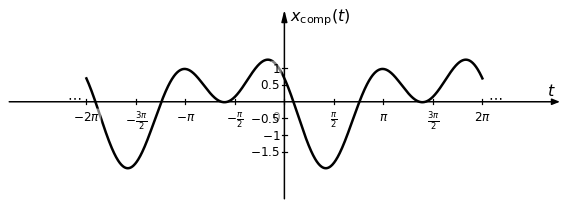

In [ ]:
from blockdiagrams import SignalPlotter
from numpy import pi

sp = SignalPlotter(horiz_range=(-2*pi, 2*pi), pi_mode=True,xticks_delta=pi/2, fraction_ticks=True, yticks_delta=0.5)
sp.add_signal("x1(t)=sin(t)", label="x_{\\mathrm{base}}(t)")
sp.add_signal("x2(t)=x1(2*t+1)", label="x_{\\mathrm{esc}}(t)")
sp.add_signal("x3(t)=x2(-t)+x1(t-3)", label="x_{\\mathrm{comp}}(t)")
sp.plot("x3")

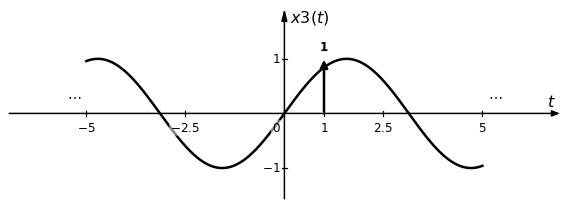

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-5, 5), xticks='auto',pi_mode=True)
sp.add_signal("x1(t)=sin(t)")
sp.add_signal("x2(t)=delta(t-1)")
sp.add_signal("x3(t)=x1(t)+x2(t)")
sp.plot("x3")

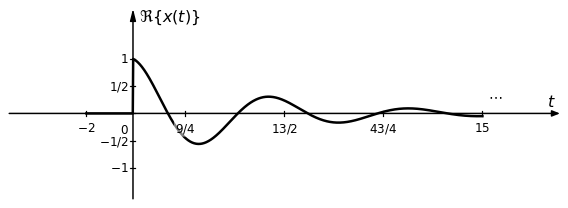

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-2, 15), vert_range=[-1, 1], fraction_ticks=True, yticks_delta=0.5)
sp.add_signal("x(t)=exp((-0.2+j*pi/3)*t)*u(t)")
sp.add_signal("x_re(t)=re(x(t))", label="\Re\{x(t)\}")
sp.add_signal("x_im(t)=im(x(t))", label="\Im\{x(t)\}")
sp.add_signal("x_abs(t)=abs(x(t))", label="|x(t)|")
sp.add_signal("x_arg(t)=arg(x(t))", label="\\angle\{x(t)\}")

sp.plot("x_re")
# sp.plot("x_im")
# sp.plot("x_abs")
# sp.plot("x_arg")


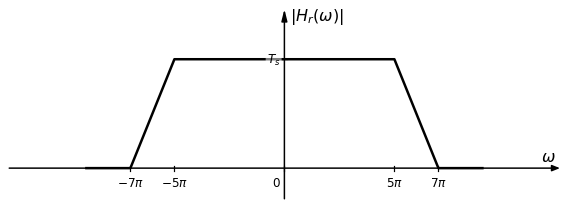

In [ ]:
from blockdiagrams import SignalPlotter
from numpy import pi

sp = SignalPlotter(
    horiz_range=(-9*pi, 9*pi),
    yticks=[0, 1/5],
    ytick_labels=['0', 'T_s'],
    xticks=[-7*pi, -5*pi, 0, 5*pi, 7*pi],
    pi_mode=True
)
sp.add_signal("H_r(\omega)=exp(-j*\omega/4) * pw((1/5, abs(\omega) <= 5*pi), (1/(10*pi)*(7*pi-abs(\omega)), (abs(\omega) > 5*pi) & (abs(\omega) < 7*pi)), (0, True))")
sp.add_signal("H_re(\omega)=re(H_r(\omega))", label="\Re\{H_r(\omega)\}")
sp.add_signal("H_im(\omega)=im(H_r(\omega))", label="\Im\{H_r(\omega)\}")
sp.add_signal("H_abs(\omega)=abs(H_r(\omega))", label="|H_r(\omega)|")
sp.add_signal("H_arg(\omega)=arg(H_r(\omega))", label="\\angle\{H_r(\omega)\}")

sp.plot("H_abs")

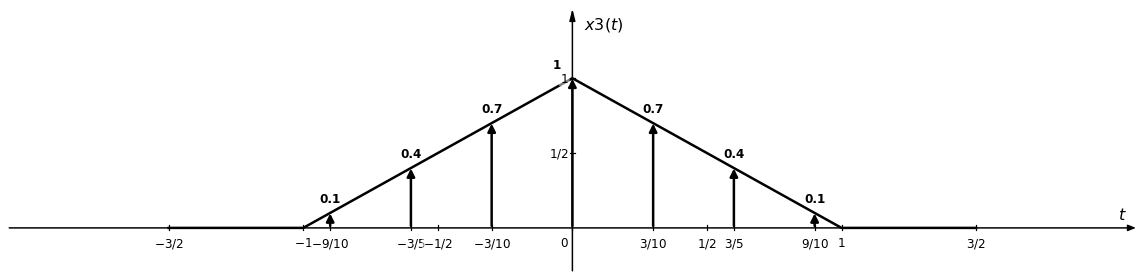

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-1.5, 1.5), fraction_ticks=True, xticks_delta=1/2, figsize=(16, 4))
sp.add_signal("x1(t)=tri(t)")
sp.add_signal('x2(t)=delta(t)', period=0.3)
sp.add_signal('x3(t)=x1(t)*(1+x2(t))')

sp.plot('x3')

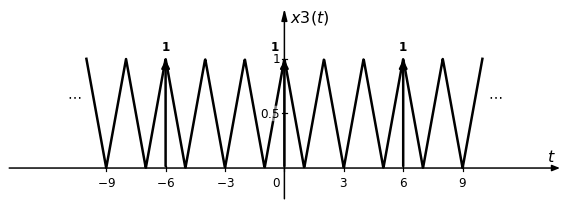

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-10, 10),
                   xticks_delta=3,
                   yticks_delta=0.5)
sp.add_signal("x1(t)=tri(t)", period=2)
sp.add_signal("x2(t)=delta(t)", period=3)
sp.add_signal("x3(t)=x1(t)*(1+x2(t))")
sp.plot("x3")

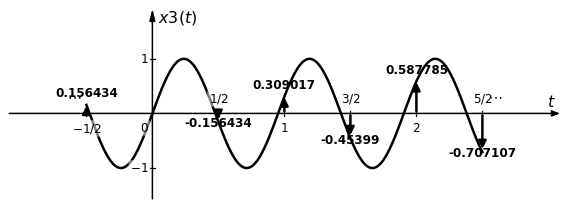

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-0.5, 2.5), fraction_ticks=True, xticks_delta=1/2)
sp.add_signal("x1(t)=sin(2.1*pi*t)")
sp.add_signal("x2(t)=delta(t)", period=1/2)
sp.add_signal("x3(t)=x1(t)*(1+x2(t))")
sp.plot('x3')

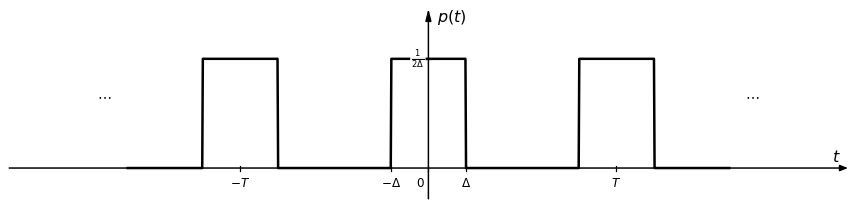

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-8, 8), 
                   xticks=[-5, -1, 0, 1, 5], 
                   xtick_labels=['-T', '-\Delta', '0', '\Delta', 'T'], 
                   yticks=[1], 
                   ytick_labels=['\\frac{1}{2\\Delta}'], 
                   figsize=(12, 3),
                   alpha=0.9)
sp.add_signal("p(t)=rect(t/2)", period=5)
sp.plot('p')

In [2]:
examples = [
    ("Triangular básica", [
        ("x(t)=tri(t)", None)
    ]),

    ("Rectangular desplazada y escalada", [
        ("x(t)=2*rect(t - 1)", None)
    ]),

    ("Impulso aislado", [
        ("x(t)=delta(t)", None)
    ]),

    ("Delta periódica", [
        ("x(t)=delta(t)", 1)
    ]),

    ("Producto: tri(t) * delta(t)", [
        ("x1(t)=tri(t)", None),
        ("x2(t)=delta(t)", None),
        ("x3(t)=x1(t)*x2(t)", None)
    ], "x3"),

    ("Señal con deltas periódicas", [
        ("x1(t)=rect(t)", None),
        ("x2(t)=delta(t)", 0.5),
        ("x3(t)=x1(t)*(1 + x2(t))", None)
    ], "x3"),

    ("Triangular periódica + rect", [
        ("x1(t)=tri(t)", 2),
        ("x2(t)=rect(t)", None),
        ("x3(t)=x1(t)+x2(t)", None)
    ], "x3"),

    ("Rampa * rect", [
        ("x1(t)=ramp(t)*rect(t/2)", None),
        ("x2(t)=x1(-2*(t-1))", None)
    ], "x2"),

    ("Reflexión y escalado", [
        ("x1(t)=rect(t)", None),
        ("x2(t)=x1(-2*t)", None)
    ], "x2"),

    ("Dirac escalada: delta(2t)", [
        ("x(t)=delta(2*t)", None)
    ]),

    ("Senoidal pura", [
        ("x(t)=sin(2*pi*t)", None)
    ]),

    ("Coseno desplazado", [
        ("x(t)=cos(2*pi*(t - 0.25))", None)
    ]),

    ("Exponencial real creciente", [
        ("x(t)=exp(t)", None)
    ]),

    ("Exponencial real decreciente", [
        ("x(t)=exp(-t/2)", None)
    ]),

    ("Parte real de exponencial compleja", [
        ("x(t)=re(exp((2*I*pi-1)*t))", None)
    ]),

    ("Parte imaginaria de exponencial compleja", [
        ("x(t)=im(exp((2*I*pi-1)*t))", None)
    ]),
    
    ("Módulo de exponencial compleja", [
        ("x(t)=abs(exp((2*I*pi-1)*t))", None)
    ]),

    ("Fase de exponencial compleja", [
        ("x(t)=arg(exp((2*I*pi-1)*t))", None)
    ])
]



--- Triangular básica ---


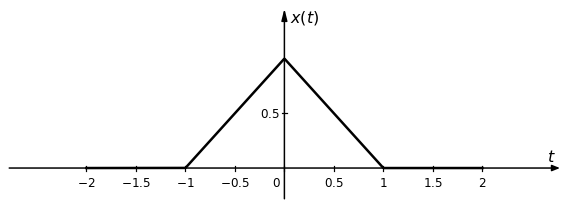


--- Rectangular desplazada y escalada ---


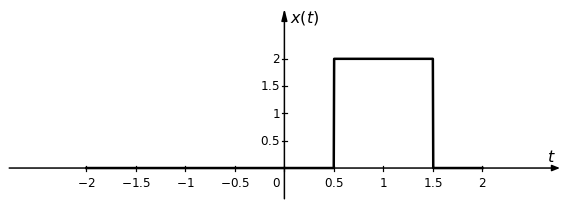


--- Impulso aislado ---


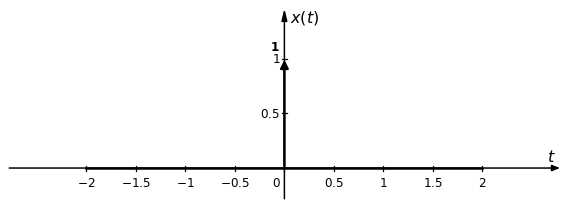


--- Delta periódica ---


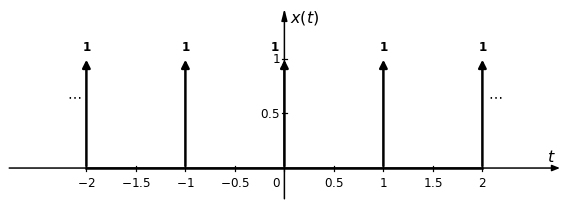


--- Producto: tri(t) * delta(t) ---


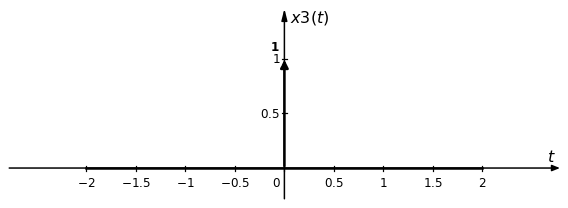


--- Señal con deltas periódicas ---


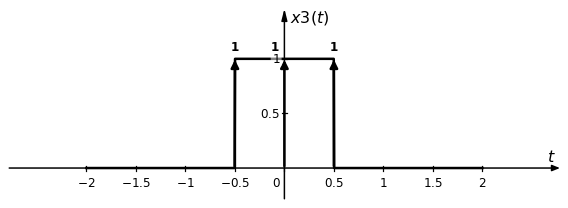


--- Triangular periódica + rect ---


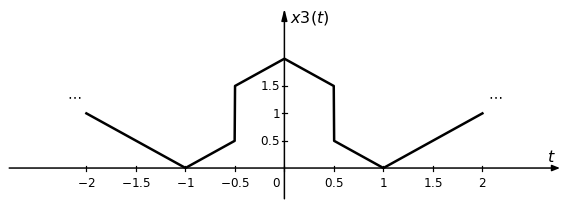


--- Rampa * rect ---


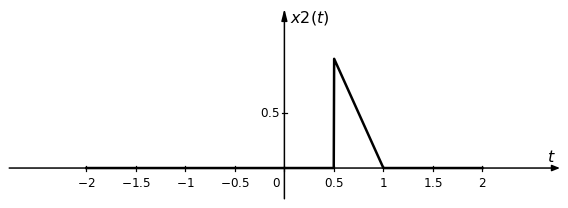


--- Reflexión y escalado ---


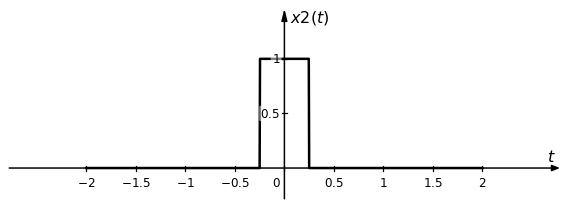


--- Dirac escalada: delta(2t) ---


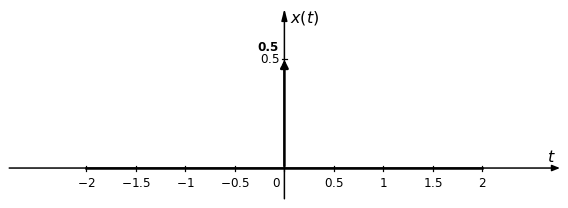


--- Senoidal pura ---


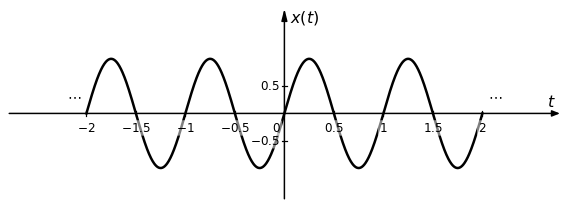


--- Coseno desplazado ---


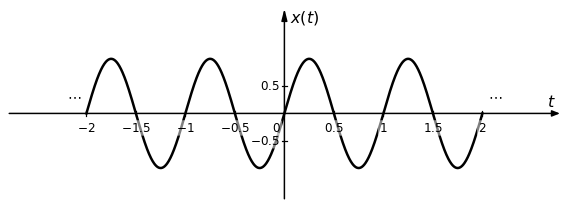


--- Exponencial real creciente ---


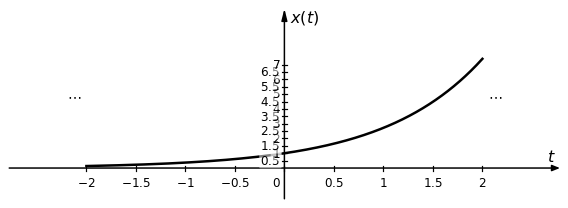


--- Exponencial real decreciente ---


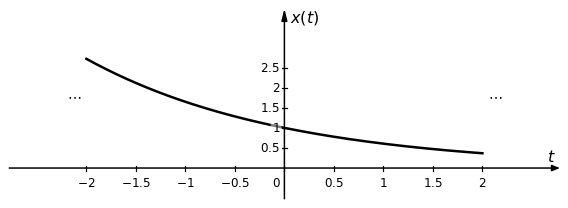


--- Parte real de exponencial compleja ---


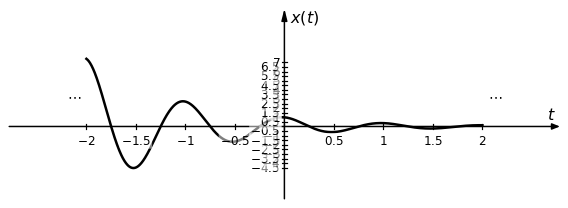


--- Parte imaginaria de exponencial compleja ---


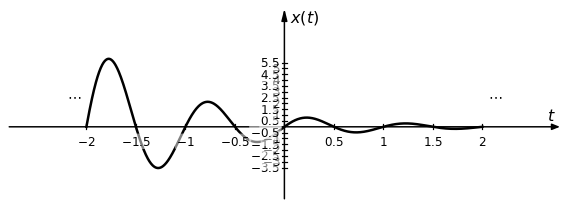


--- Módulo de exponencial compleja ---


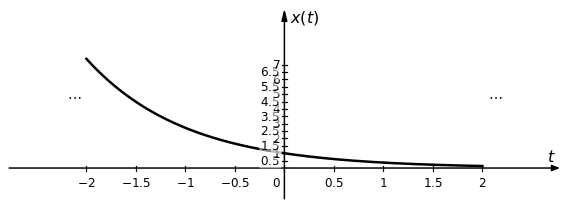


--- Fase de exponencial compleja ---


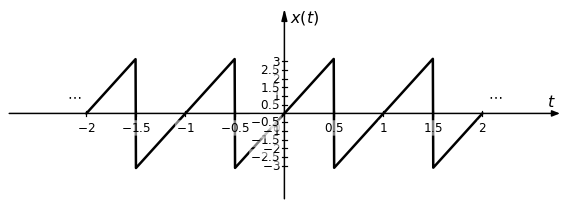

In [3]:
from blockdiagrams import SignalPlotter

for example in examples:
    if len(example) == 3:
        title, signals, to_plot = example
    else:
        title, signals = example
        to_plot = signals[-1][0].split('(')[0]

    print(f"\n--- {title} ---")
    sp = SignalPlotter(horiz_range=(-2, 2),
                       vert_range=None,
                       fraction_ticks=True,
                       xticks_delta=0.5,
                       yticks_delta=0.5,
                       figsize=(8, 3),
                       pi_mode=True)
    for expr_str, period in signals:
        sp.add_signal(expr_str, period=period)
    sp.plot(to_plot)


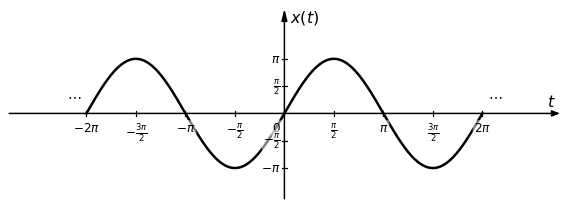

In [ ]:
from blockdiagrams import SignalPlotter
from numpy import pi

sp = SignalPlotter(
    horiz_range=(-2*pi, 2*pi),
    vert_range=(-pi, pi),
    pi_mode=True,
    xticks='auto',
    xticks_delta=pi/2,
    yticks='auto',
    yticks_delta=pi/2
)
sp.add_signal("x(t)=pi*sin(t)")
sp.plot("x")

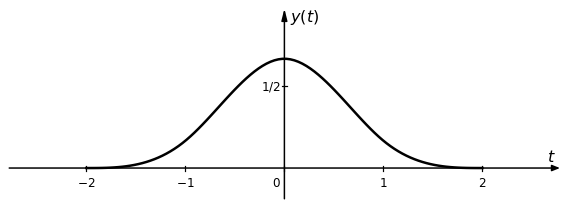

In [6]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-2, 2), xticks=[-2, -1, 0, 1, 2], num_points=100, fraction_ticks=True)

sp.add_signal("x(t)=tri(t)")
sp.add_signal("h(t)=tri(t)")

# Paso 1: Ver los pasos intermedios para t=1
# sp.plot_convolution_steps("x", "h", t_val=1, tau='lambda', t='omega')

# Paso 2: Ver solo una señal modificada
# sp.plot_convolution_view("h(t-tau)", t_val=1, tau='lambda', t='omega')

# Paso 3: Ver la convolución completa
sp.plot_convolution_result("x", "h")


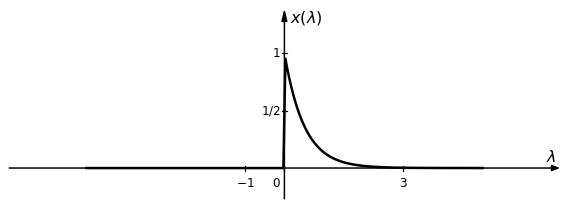

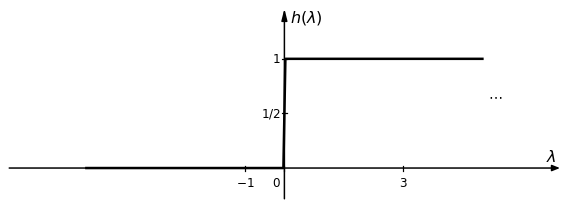

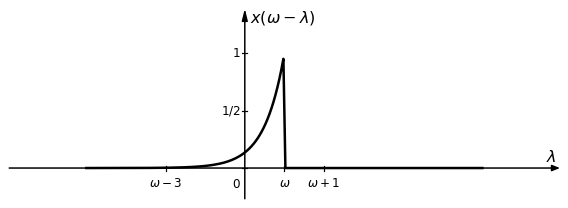

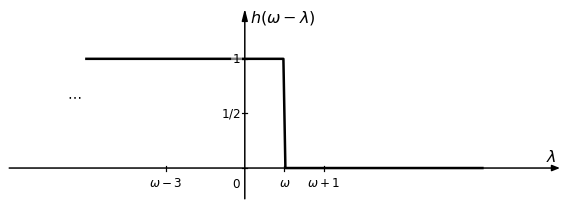

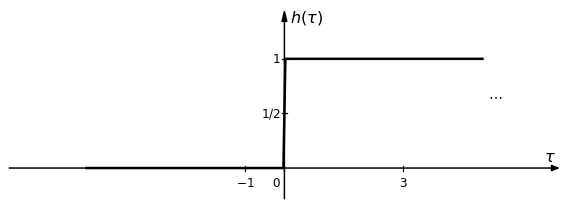

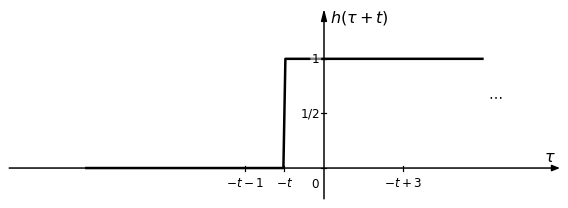

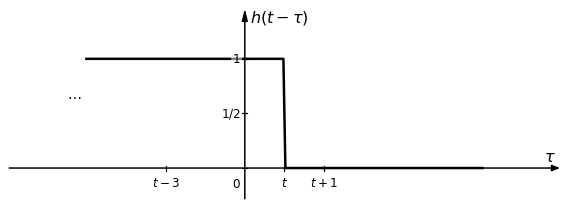

In [1]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(xticks=[-1, 0, 3], num_points=200, fraction_ticks=True)

sp.add_signal("x(t)=exp(-2t)*u(t)")
sp.add_signal("h(t)=u(t)")

# Paso 1: Ver los pasos intermedios para t=1
sp.plot_convolution_steps("x", "h", t_val=1, tau='lambda', t='omega')

# Paso 2: Ver solo una señal modificada
sp.plot_convolution_view("h(tau)", t_val=1)
sp.plot_convolution_view("h(tau+t)", t_val=1)
sp.plot_convolution_view("h(t-tau)", t_val=1)

# Corregir horiz_range custom en este caso

# Paso 3: Ver la convolución completa
# sp.plot_convolution_result("x", "h")

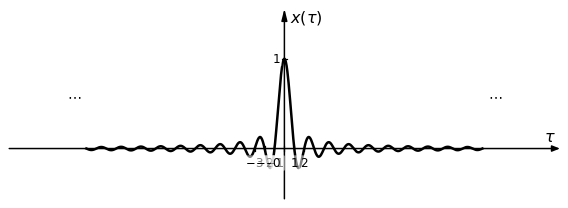

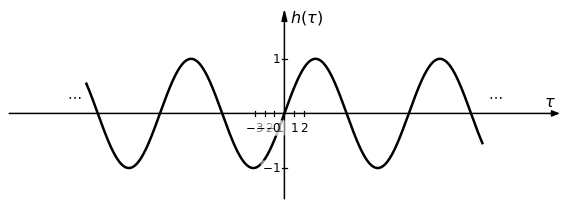

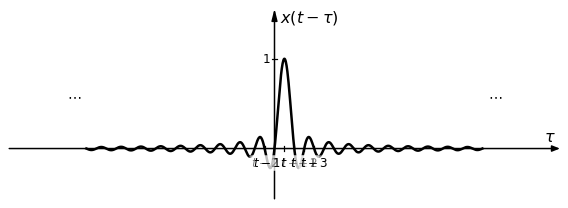

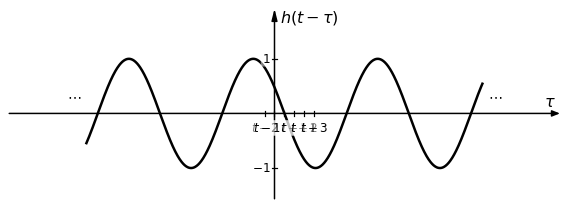

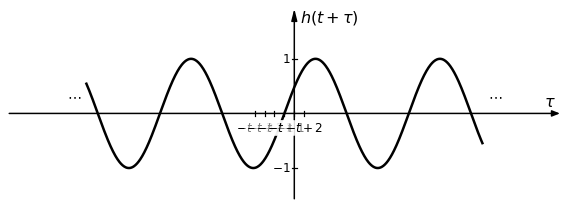

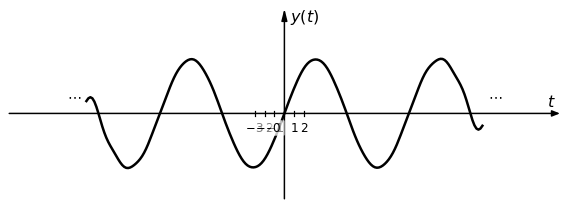

In [1]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-20, 20), xticks=[-3, -2, -1, 0, 1, 2], fraction_ticks=True)

sp.add_signal("x(t)=sinc(t)")
sp.add_signal("h(t)=sin(t/2)")

# Paso 1: Ver los pasos intermedios para t=1
sp.plot_convolution_steps("x", "h", t_val=1)

# Paso 2: Ver solo una señal modificada
sp.plot_convolution_view("h(t+tau)", t_val=1)

# Paso 3: Ver la convolución completa
sp.plot_convolution_result("x", "h", num_points=200)